In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('PrepHR.csv')
df = df.drop(columns='Unnamed: 0')

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df['Education'].unique()

array(['Higher Secondary', 'High School', 'Masters', 'Bacherlors',
       'Doctorate'], dtype=object)

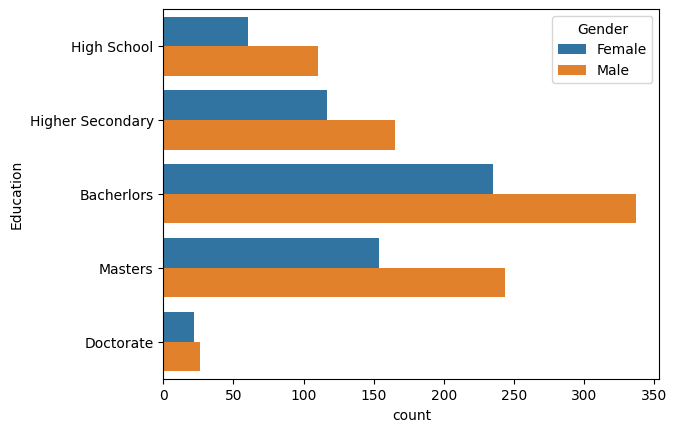

In [25]:
order = ['High School','Higher Secondary','Bacherlors','Masters','Doctorate']
sns.countplot(data = df,y='Education',order=order,hue='Gender')
plt.show()

<Axes: xlabel='count', ylabel='Department'>

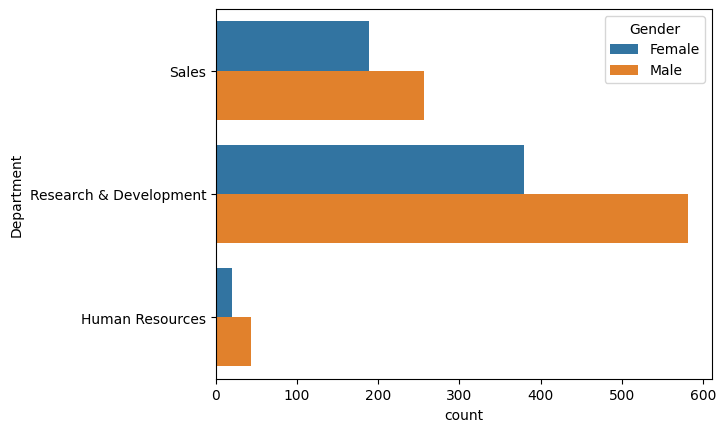

In [27]:
sns.countplot(data = df,y='Department',hue='Gender')

<Axes: xlabel='count', ylabel='MaritalStatus'>

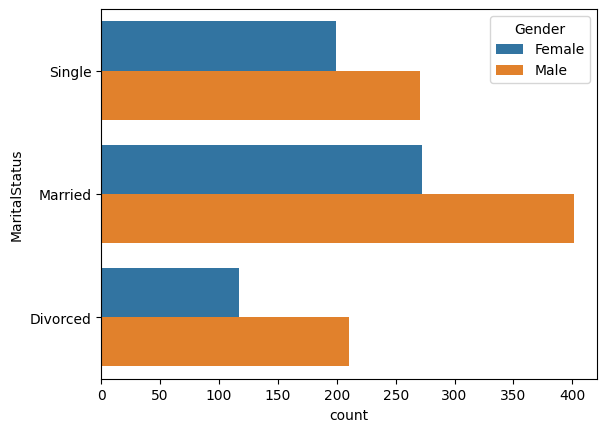

In [35]:
sns.countplot(data = df,y='MaritalStatus',hue='Gender')

<Axes: xlabel='count', ylabel='Gender'>

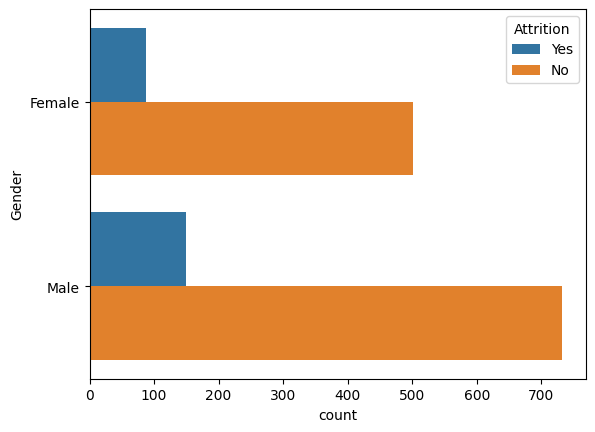

In [31]:
sns.countplot(data = df,y='Gender',hue='Attrition')